In [1]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
from tqdm import tqdm
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics import accuracy_score

x, y = make_classification(n_samples=10000, n_features=2, n_informative=2, n_redundant= 0, n_clusters_per_class=1, random_state=60)
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, random_state=42)


In [2]:
print('Complete Data:\n \n', x)

print('\nLength: ', len(x))

print('\nShape: ', np.shape(x))

Complete Data:
 
 [[ 0.9944479  -1.51666697]
 [-0.3404792  -0.39546072]
 [-0.92978    -1.44854911]
 ...
 [-2.91953119 -1.96829635]
 [ 0.1717912  -1.53408936]
 [-2.54105874 -1.67856635]]

Length:  10000

Shape:  (10000, 2)


##### Complete Data is a 2-D array (list of lists) of 10K data-points with 2 dimensions/features for each data-point

In [3]:
print('Class-labels Data:\n \n', y)

print('\nLength: ', len(y))

print('\nShape: ', np.shape(y))

Class-labels Data:
 
 [0 1 1 ... 1 0 1]

Length:  10000

Shape:  (10000,)


##### Class-labels Data is a 1-D array containing all the class-labels for x. Each class-label corresponds to each data-point in Complete Data x respectively.

In [4]:
print(len(x_train))

# 75% of data-points in x being allocated to train-data

7500


In [5]:
print(len(x_test)) 

# remaining 25% of data-points in x being allocated to test-data

2500


####  x_test data-points with respective colour-coded binary class-labels before drawing the 'Decision Boundary'

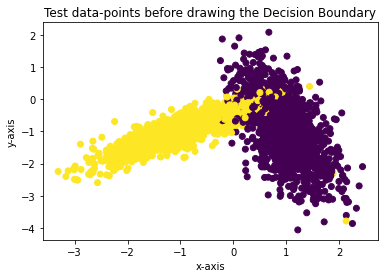

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(x_test[:,0], x_test[:,1],c=y_test)
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title('Test data-points before drawing the Decision Boundary')
plt.show()

# Implementing Custom RandomSearchCV

In [7]:
def RandomSearchCV(x_train, y_train, classifier, params, folds):
    
    trainscores = []
    cvscores  = []
    
    for k in params['n_neighbors']:
        
        trainscores_per_fold = []
        cvscores_per_fold  = []
        
        number_of_points_in_group = len(x_train)//folds 
        
# we are dividing the train dataset 'x_train' into given number of folds. 
# Here folds = 3, hence number of groups = 3. 
# In each loop, 2 groups are taken for training the function/classifier,
# and then the remaining 3rd group is used for cross-validation, i.e., for 
# testing the accuracy of the function for the respective 'k' value.
        
        all_indices = list(np.arange(len(x_train)))
        
        for j in range(0, folds):
            
            start_index = j*number_of_points_in_group
            cv_indices = list(np.arange(start_index, (start_index+number_of_points_in_group)))
            train_indices = list(set(all_indices) - set(cv_indices))

            X_train = x_train[train_indices]
            Y_train = y_train[train_indices]
            X_cv  = x_train[cv_indices]
            Y_cv  = y_train[cv_indices]

            classifier.n_neighbors = k
            classifier.fit(X_train,Y_train)

            Y_predicted = classifier.predict(X_cv)
            cvscores_per_fold.append(accuracy_score(Y_cv, Y_predicted))

            Y_predicted = classifier.predict(X_train)
            trainscores_per_fold.append(accuracy_score(Y_train, Y_predicted))
        trainscores.append(np.mean(np.array(trainscores_per_fold)))
        cvscores.append(np.mean(np.array(cvscores_per_fold)))
        
    return trainscores, cvscores


In [8]:
# Alternate approach for dividing the train-data and test-data:

# import itertools

# number_of_points_in_group = len(x_train)//folds

# G1 = x_train[0:number_of_points_in_group]
# G2 = x_train[number_of_points_in_group:(2*number_of_points_in_group)]
# G3 = x_train[(2*number_of_points_in_group): ]
        
# groups = [G1, G2, G3]
# c = itertools.combinations(groups, 2) # selecting a combination of
#                                       # two groups in each iteration

#     for i in c: # 'i' is a tuple of two lists of each selected group in c
            
#         list_train_indices = list(i)
        
#         train_indices = []
        
#         for sublist in list_train_indices:
#             for index in sublist:
#                 train_indices.append(index)
        
#         cv_indices = list(set(x_train) - set(train_indices))


k =  [9, 13, 15, 17, 21, 29, 41, 43, 45, 49]

k-value and accuracy score for Cross-Validation data: 
 
 {9: 0.9529333333333333, 13: 0.9544, 15: 0.9540000000000001, 17: 0.9545333333333333, 21: 0.9541333333333334, 29: 0.9550666666666667, 41: 0.9558666666666666, 43: 0.9564, 45: 0.9565333333333333, 49: 0.9558666666666666}


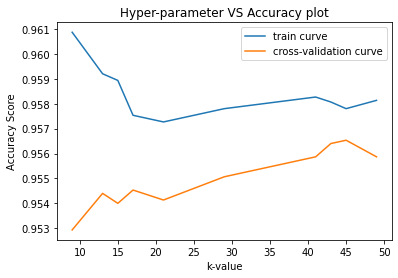

In [12]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import random
import warnings
warnings.filterwarnings("ignore")


neigh = KNeighborsClassifier() #initializing the model


random_odd_numbers = [] # only keeping the odd numbers for 
                        # avoiding the problem of equal vote's

for k in range(1, 100):
    number = random.randint(1, 51)
    if number % 2 != 0:
        if number not in random_odd_numbers: #for avoiding duplicates
            random_odd_numbers.append(number)     
    if len(random_odd_numbers) == 10:
        break
        
sorted_list_random_odd_numbers = sorted(random_odd_numbers)
print('k = ', sorted_list_random_odd_numbers)

params = {'n_neighbors':sorted_list_random_odd_numbers}
folds = 3

train_scores, cv_scores = RandomSearchCV(x_train, y_train, neigh, params, folds)

k_cv_accuracy_map = dict(zip(sorted_list_random_odd_numbers, cv_scores))

print('\nk-value and accuracy score for Cross-Validation data: \n \n', k_cv_accuracy_map)

plt.plot(params['n_neighbors'],train_scores, label='train curve')
plt.plot(params['n_neighbors'],cv_scores, label='cross-validation curve')
plt.title('Hyper-parameter VS Accuracy plot')
plt.xlabel('k-value')
plt.ylabel('Accuracy Score')
plt.legend()
plt.show()

In [19]:
k_train_accuracy_map = dict(zip(sorted_list_random_odd_numbers, train_scores))
print('\nk-value and accuracy score for train data: \n \n', k_train_accuracy_map)
print()


k-value and accuracy score for train data: 
 
 {9: 0.9608666666666666, 13: 0.9592, 15: 0.9589333333333334, 17: 0.9575333333333335, 21: 0.9572666666666666, 29: 0.9578000000000001, 41: 0.9582666666666667, 43: 0.9580666666666667, 45: 0.9578000000000001, 49: 0.9581333333333334}



### Choosing the right 'K':

* From observing the above 'k-value and accuracy score' dictionaries and the above plot, K = 45 would give as the best possible results. 


* Explanation for choosing k = 45:   

Reason - 1:  
   
In the 'k-value and accuracy score' dictionary, we can see that:  
i) for k = 29, the accuracy score = 95.50% which is pretty good.  
ii) for k = 45, the accuracy score = 95.65% which is also pretty good and 0.15% more than for k = 29.  

In general sense, we can ignore the slight increase in accuracy score (of about 0.15%) for k = 45 against k = 29. It will make the task much more simple and save resources (both processing task and time) if we take k = 29. To put in simple words, it will make the system more efficient.    
But in Machine Learning, even the slightest differences matter alot and can have good/huge impact on the final output. Here it is the increase of accuracy score by 0.15%. In this particular case, accuracy and precision matter more than efficiency. Accuracy carries more weightage than efficiency. It does not mean we should not consider efficiency, what we have to do is to build a system which balances both Accuracy and Efficiency, but giving more weightage to accuracy than efficiency wherever necessary. Also, the modern computers/machines are much more efficient and are equipped with abundant resources to use.

Reason - 2:   

The distance between the highest value of accuracy score for Cross-Validation and for its corresponding training score is minimum at k = 45. That is both the curves are closely converging at k = 45. Mathematically speaking, the minimum difference/distance = 95.78 - 95.65 = 0.13. 
  



In [15]:

def plot_decision_boundary(X1, X2, y, clf):
        # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    x_min, x_max = X1.min() - 1, X1.max() + 1
    y_min, y_max = X2.min() - 1, X2.max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    # Plot also the training points
    plt.scatter(X1, X2, c=y, cmap=cmap_bold)
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xlabel('x-axis')
    plt.ylabel('y-axis')
    plt.title("2-Class classification (k = %i)" % (clf.n_neighbors))
    plt.show()

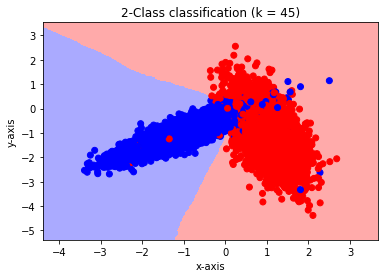

In [16]:
from matplotlib.colors import ListedColormap
neigh = KNeighborsClassifier(n_neighbors = 45)
neigh.fit(x_train, y_train)
plot_decision_boundary(x_train[:, 0], x_train[:, 1], y_train, neigh)